# DATA SCIENCE

### PROJECT BY TANUSRI JANA

## Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.


In [2]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
#Loading data
bank = pd.read_csv("bank.csv",sep=';')

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
bank.shape

(4521, 17)

### Data Pre-processing

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
#Statistical Analysis
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [8]:
#Checking Missing values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
#Checking for duplicates
bank.duplicated().sum()

np.int64(0)

In [10]:
#Investigating these 0 duplicates
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


## Exploratory Data Analysis

This code loads the Bank Marketing dataset, preprocesses the data by converting categorical variables to category type and numerical variables to int type, splits the data into features (X) and target (y), splits the data into training and testing sets, creates a decision tree classifier, trains the classifier, makes predictions on the testing set, and evaluates the classifier using accuracy, classification report, and confusion matrix.

### Age Distribution

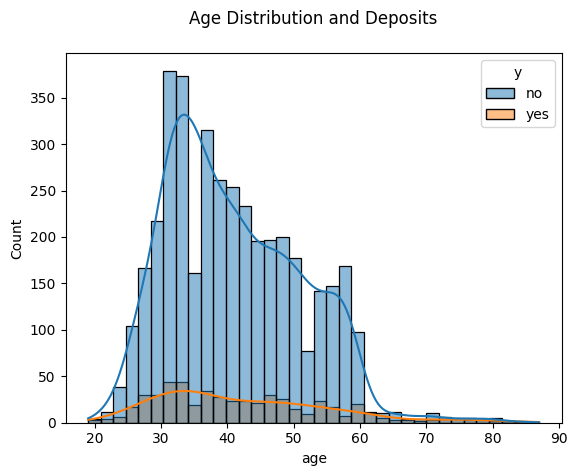

In [11]:
sns.histplot(x="age", data=bank, kde=True, hue= "y")
plt.title("Age Distribution and Deposits\n")
plt.show()

### Distribution of Occupation

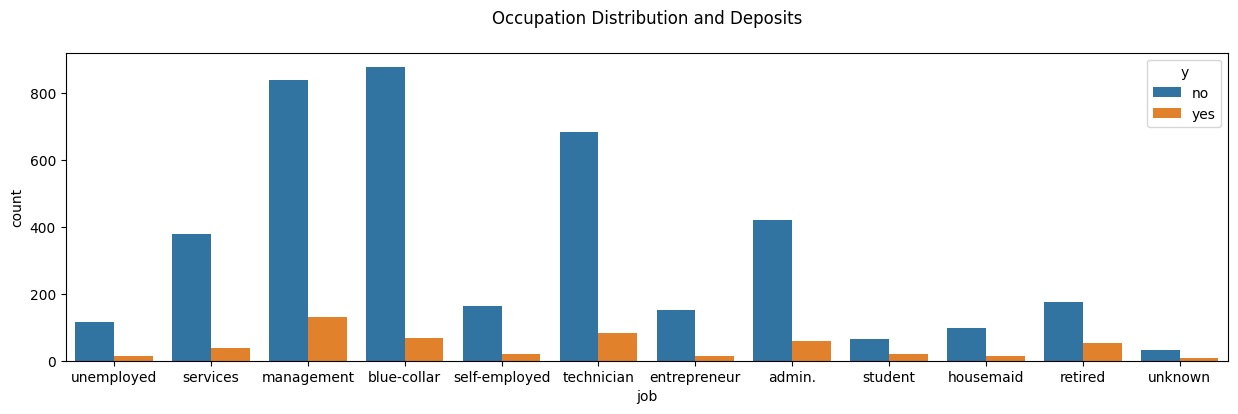

In [12]:
plt.figure(figsize=(15,4))
sns.countplot(x="job", data= bank, hue ="y")
plt.title("Occupation Distribution and Deposits\n")
plt.show()

 ### Distribution of Marital Status

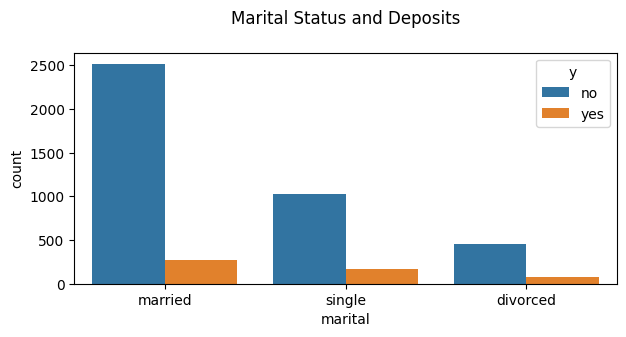

In [13]:
plt.figure(figsize=(7,3))
sns.countplot(x="marital", data= bank, hue ="y")
plt.title("Marital Status and Deposits\n")
plt.show()

### Distribution of Education Status

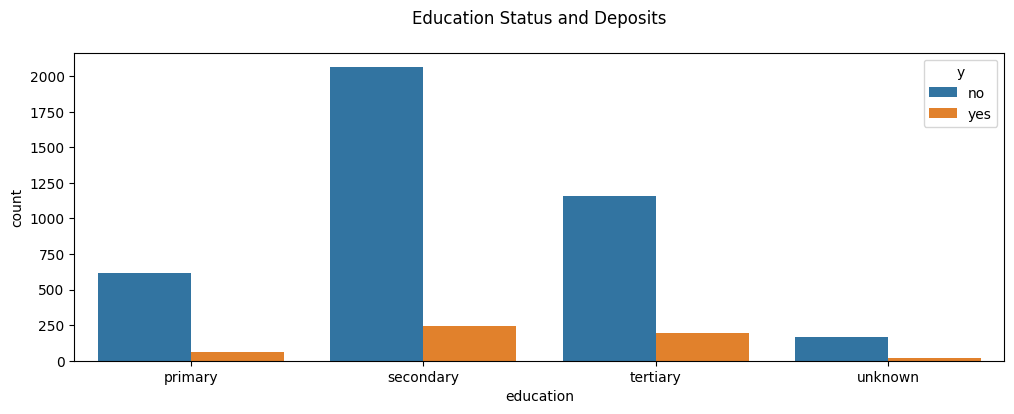

In [14]:
plt.figure(figsize=(12,4))
sns.countplot(x="education", data= bank, hue ="y")
plt.title("Education Status and Deposits\n")
plt.show()

### Credit defaults

In [15]:
bank.default.value_counts()

default
no     4445
yes      76
Name: count, dtype: int64

### Distribution of Housing Loan

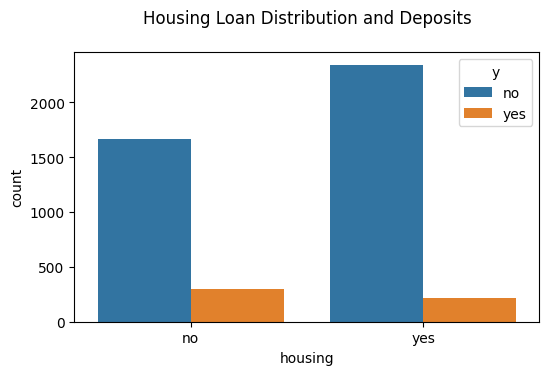

In [16]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="housing", data= bank, hue ="y")
plt.title("Housing Loan Distribution and Deposits\n")
plt.show()

### Distribution of Personal Loan

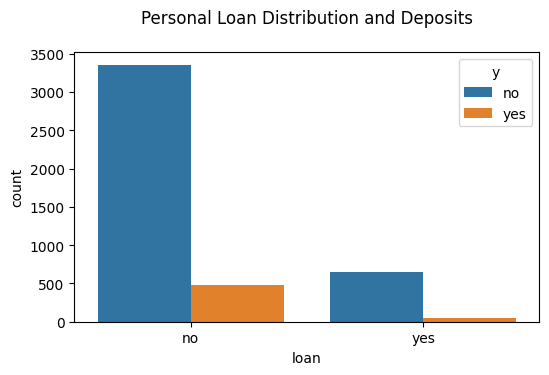

In [17]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="loan", data= bank, hue ="y")
plt.title("Personal Loan Distribution and Deposits\n")
plt.show()

### Distribution of Outcome (Term Deposits)

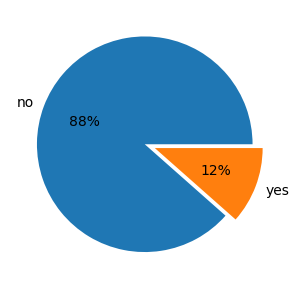

In [18]:
#Count of Outcome
bank.y.value_counts()
keys = bank.y.value_counts().index
data = bank.y.value_counts().values
plt.figure(figsize=(6,3.5))
explode = [0,0.1]
plt.pie(data,labels=keys,explode=explode, autopct='%.0f%%')
plt.show()

### Label Encoding Categorical Features

In [19]:
cols = bank.select_dtypes("object").columns
cols


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [20]:
le = LabelEncoder()

bank[cols] = bank[cols].apply(le.fit_transform)

In [21]:
bank.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0


### Correlation Analysis using Heatmap

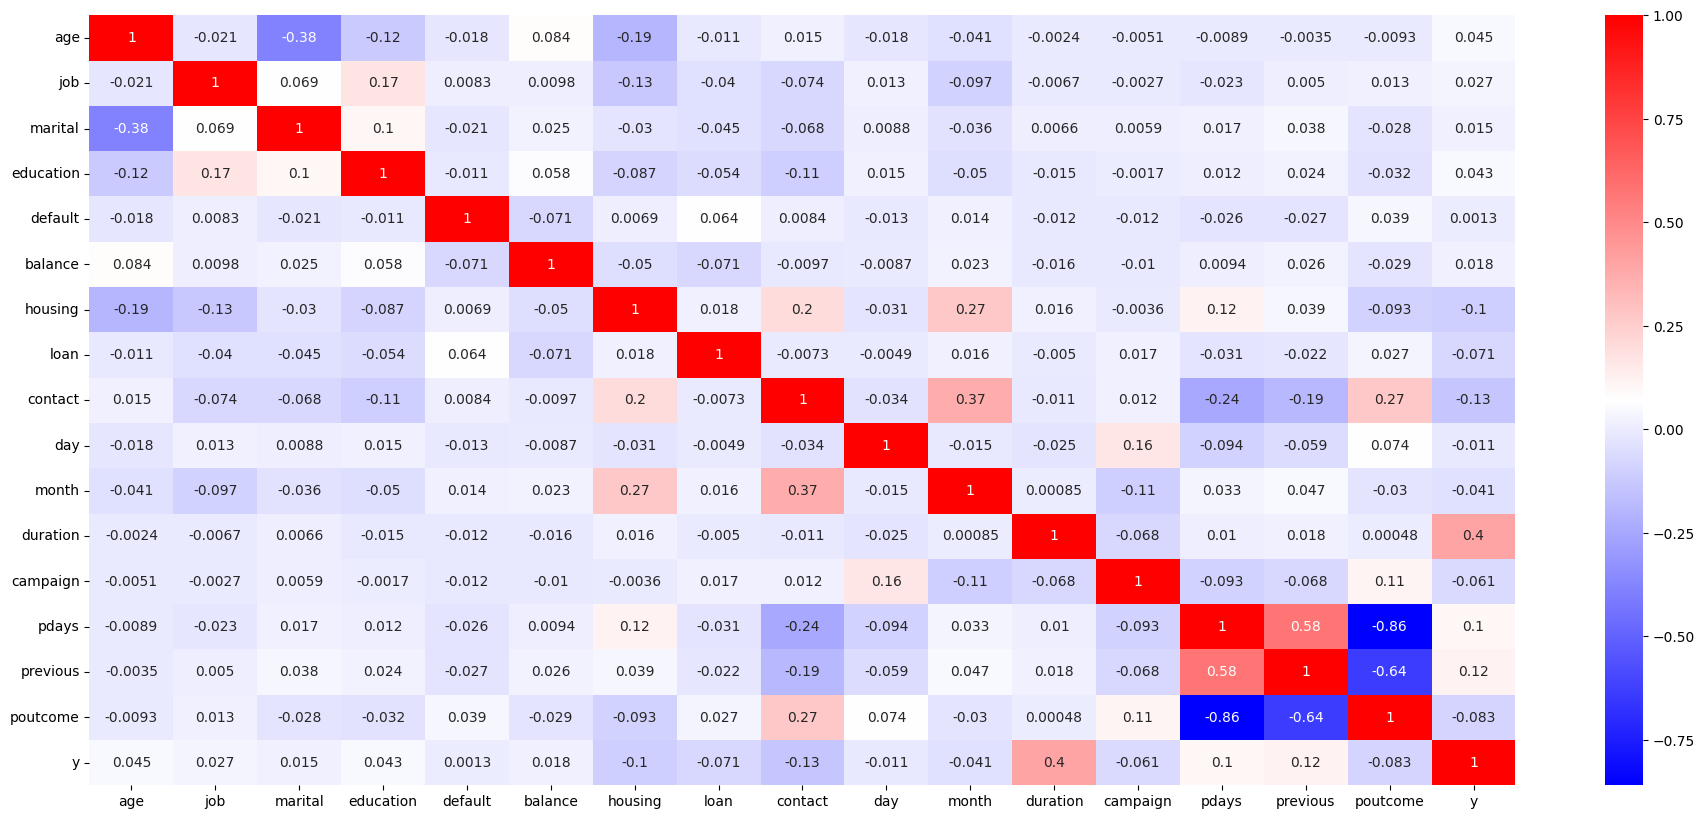

In [22]:
plt.figure(figsize=(23,10))
sns.heatmap(bank.corr(), cmap='bwr', annot=True)
plt.show()

Outcome "y" is positively correlated with duration of call and also shows slight correlation with previous attempts of call. This implies that clients went ahead with Term deposits subscription after gaining sufficient insights from bank calls and persuation.
multicolinearty can be seen among some input features. This can be handled by dropping those variables or by performing LDA(Linear discriminant analysis) on the data.

 ## Standardisation


In [23]:
#Splitting input and output
X = bank.drop("y", axis=1)
y = bank.y

In [24]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

### Model building - Decision Tree Classifier

In [25]:
#Train-test split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)


In [26]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [27]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))  
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))    

Train Score: 1.0
Test Score: 0.8570375829034635


In [28]:
cross_val_score(decision_tree, train_X, train_y, cv=5).mean()

np.float64(0.8694672745815586)

In [29]:
ypred = decision_tree.predict(test_X)
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1211
           1       0.33      0.33      0.33       146

    accuracy                           0.86      1357
   macro avg       0.63      0.62      0.63      1357
weighted avg       0.86      0.86      0.86      1357



 ## Hyperparameter tunning

In [30]:
#Applying Grid search cv to find best estimaters to improve model performance

param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

In [31]:
gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [32]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5}

In [33]:
gscv.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5)

In [34]:
cross_val_score(gscv.best_estimator_, train_X, train_y, cv=5).mean() 

np.float64(0.8944357789909413)

In [35]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [36]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.9171934260429836
Test Score: 0.8975681650700074


In [37]:
pred_y = clf.predict(test_X)

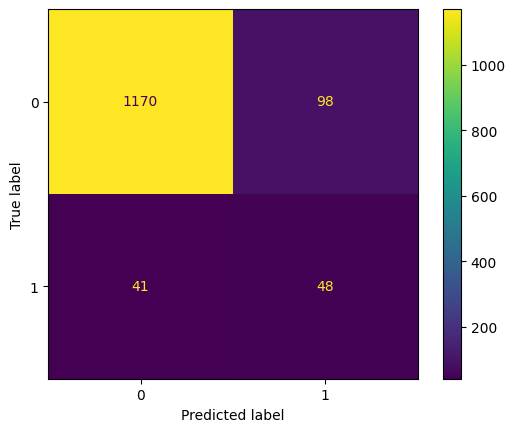

In [38]:
#Confusion Matrix
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()

In [39]:
#Classification Report
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1268
           1       0.33      0.54      0.41        89

    accuracy                           0.90      1357
   macro avg       0.65      0.73      0.68      1357
weighted avg       0.92      0.90      0.91      1357



In [40]:
#Accuracy Score
accuracy = accuracy_score(test_y,pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 89.75681650700074


In [41]:
#Cross Validation Score
Cross_val = cross_val_score(clf, test_X,test_y, cv=5).mean()     
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val*100)

Cross-Validation Accuracy Scores Decision Tree :  87.25444975037986


## Visualizing the Tree

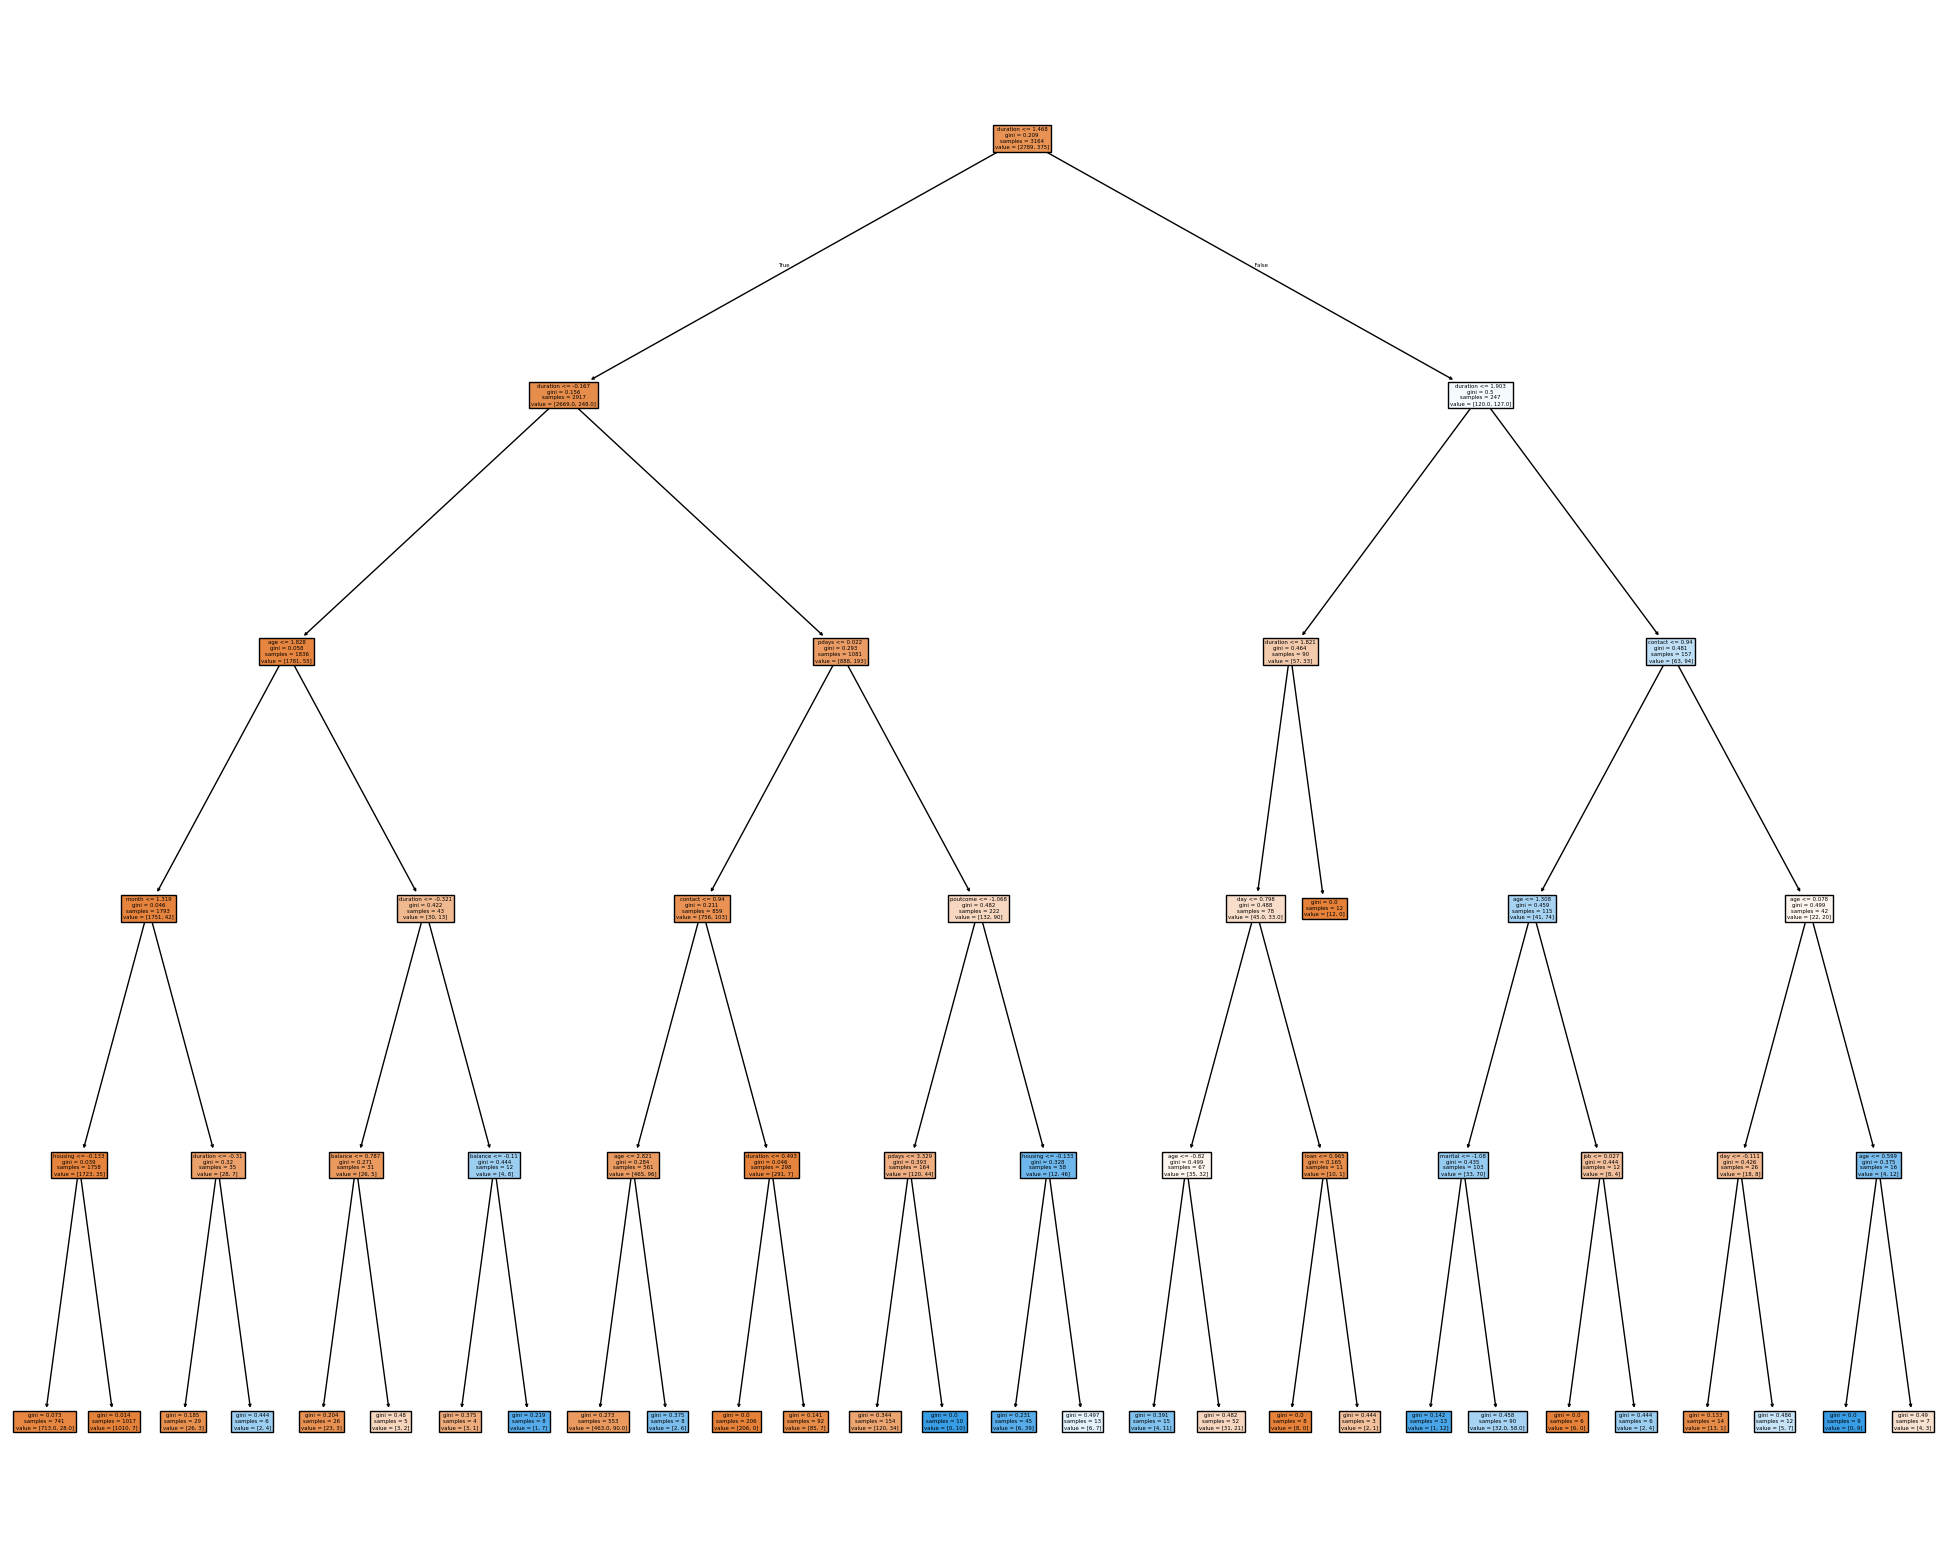

In [42]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(clf,filled=True,feature_names=X.columns)

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Bank Marketing dataset
bank_data = pd.read_csv('bank.csv')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
y_pred = dt_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8718232044198895
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       807
           1       0.42      0.47      0.44        98

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.68       905
weighted avg       0.88      0.87      0.88       905



### Conclusion and Key Insights
In this project, we embarked on a journey to build a predictive model for term deposit subscriptions in a banking context to help a Portuguese banking institution tailor its marketing efforts effectively. Let's recap the key takeaways and insights from this endeavor:


### Data Pre-processing:

The initial data inspection revealed a well-structured dataset with no missing values. While we encountered some duplicate entries, they were not considered errors but rather different campaigns targeting the same clients.

### Exploratory Data Analysis (EDA):

The age distribution of clients highlighted that the majority fell in the 30-40 age range, coinciding with the highest subscription rate for term deposits.
Occupation-wise, clients in administrative, blue-collar and technician roles formed the majority and were more likely to subscribe to term deposits.
Marital status leaned heavily toward the "married" category.
Clients with university degrees or high-level education were more prominent and had a higher subscription rate.
Credit defaults were rare, with the vast majority of clients having no credit defaults.
Clients with housing loans were more likely to subscribe to term deposits, while those with personal loans were less likely.

### Model Building and Evaluation:

We implemented a Decision Tree classifier to predict term deposit subscriptions.
The model exhibited strong performance, achieving an accuracy rate of approximately 91.52% on both training and testing data.
Cross-validation confirmed the robustness of our model, with an accuracy score of around 91.60%.
The classification report revealed a balanced model with reasonable precision, recall, and F1-scores for both subscribed and non-subscribed clients.

### Insights:
The duration of calls was a significant predictor of term deposit subscriptions. Clients tended to subscribe after longer conversations, suggesting the importance of engaging clients effectively during calls.
Previous attempts at contact also played a role, indicating that repeated contact can be fruitful in convincing clients to subscribe.
Multicollinearity among some input features was observed, potentially affecting model performance. Consideration should be given to addressing this issue in future iterations.

### Future Directions:

To further enhance predictive accuracy, exploring other machine learning algorithms or ensemble methods could be beneficial. Feature engineering and selection methods could be employed to mitigate multicollinearity. Incorporating external data sources, such as economic indicators or market trends, may provide additional insights and improve model performance. A real-time deployment of the model into the bank's operational systems can automate decision-making and streamline marketing efforts.